In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Manage Data

In [3]:
df_liberal = pd.read_csv('liberal.csv')
df_conservative = pd.read_csv('conservative.csv')

In [4]:
dataframes = [df_liberal, df_conservative]
df = pd.concat(dataframes)

In [5]:
df = df[-df['label'].isnull()]

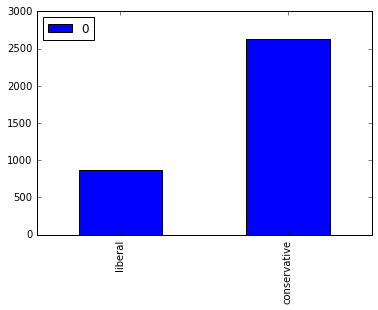

In [6]:
from collections import Counter

counts = Counter(df['label'].values)
tmp = pd.DataFrame.from_dict(counts, orient='index')
tmp.plot(kind='bar')

In [7]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

y = lb.fit_transform(df.copy()['label'].values)

print(y[:10])

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


## Sklearn Transformer Example

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class Tokenizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        return

    def fit(self, X, y=None):
        # Nothing here
        return self

    def transform(self, X, y=None):
        from nltk import word_tokenize
        tokenized = []
        for text in X:
            tokenized.append(word_tokenize(text))

        return tokenized

In [ ]:
tk = Tokenizer()

tokenized = tk.fit_transform(df.copy()['text'].values)

## Sklearn Pipeline Example

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

text_pipeline = Pipeline([
    ('counts', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

X = text_pipeline.fit_transform(df.copy()['text'].values)

In [9]:
X.shape

(3497, 12109)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_train = y_train.reshape(y_train.shape[0],)
y_test = y_test.reshape(y_test.shape[0],)

# Model Testing

In [12]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.decomposition import TruncatedSVD

In [34]:
scores = []

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "Gradient Boost", "Extra Trees", "Extreme Gradient Boost"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    XGBClassifier()]

for classifier in classifiers:
    clf = Pipeline([
        ('svd', TruncatedSVD(n_components=100)),
        ('clf', classifier)
    ])
    score = cross_val_score(clf, X_train, y_train, cv=3, scoring='f1')
    scores.append(score.mean())
    
print(list(zip(names, scores)))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.

[('Nearest Neighbors', 0.21780690759051202), ('Linear SVM', 0.0), ('RBF SVM', 0.0), ('Decision Tree', 0.07071283496766069), ('Random Forest', 0.0), ('Neural Net', 0.0), ('AdaBoost', 0.20373073545226381), ('Naive Bayes', 0.40558899737668191), ('QDA', 0.40372218770050816), ('Gradient Boost', 0.043445217765293469), ('Extra Trees', 0.048313710125053054), ('Extreme Gradient Boost', 0.032938920248950641)]


# Model Visualization

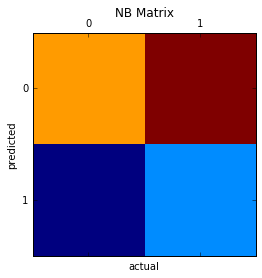

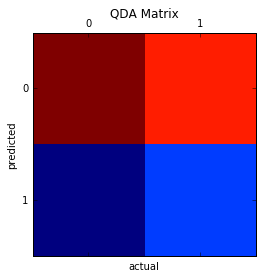

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

nb_pipeline = Pipeline([
    ('svd', TruncatedSVD(n_components=100)),
    ('clf', GaussianNB())
])

qda_pipeline = Pipeline([
    ('svd', TruncatedSVD(n_components=100)),
    ('clf', QuadraticDiscriminantAnalysis())
])

nb_preds = cross_val_predict(nb_pipeline, X_train, y_train)
qda_preds = cross_val_predict(qda_pipeline, X_train, y_train)

nb_mat = confusion_matrix(y_train, nb_preds)
qda_mat = confusion_matrix(y_train, qda_preds)

plt.matshow(nb_mat, cmap=plt.cm.gray)
plt.ylabel('predicted')
plt.xlabel('actual')
plt.title('NB Matrix')

plt.matshow(qda_mat, cmap=plt.cm.gray)
plt.ylabel('predicted')
plt.xlabel('actual')
plt.title('QDA Matrix')

F1 score: 0.7375293810394359


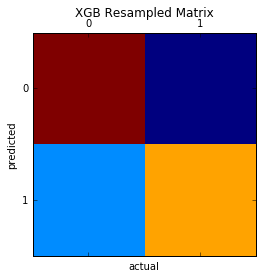

In [85]:
xgb_clf = XGBClassifier()

preds = cross_val_predict(xgb_clf, X_res, y_res)

mat = confusion_matrix(y_res, preds)

plt.matshow(mat, cmap=plt.cm.gray)
plt.ylabel('predicted')
plt.xlabel('actual')
plt.title('XGB Resampled Matrix')
print("F1 score: {}".format(f1_score(preds, y_res)))

## Oversampling

In [15]:
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

ros = SMOTE(random_state=42)

X_res, y_res = ros.fit_sample(X_train.toarray(), y_train)

# Feature Importances

In [38]:
clf = XGBClassifier().fit(X_res, y_res)

In [78]:
word_idx = list(text_pipeline.named_steps['counts'].vocabulary_.items())
sorted_words = [w[0] for w in sorted(word_idx, key=lambda x: x[1])]

importances = clf.feature_importances_

sorted_importances = sorted(list(zip(sorted_words, importances)), key=lambda x: x[1], reverse=True)

print(sorted_importances[:50])

[('the', 0.034274194), ('to', 0.026209677), ('with', 0.02016129), ('conservative', 0.018145161), ('is', 0.018145161), ('and', 0.016129032), ('in', 0.016129032), ('it', 0.016129032), ('removed', 0.016129032), ('deleted', 0.014112903), ('edit', 0.014112903), ('fox', 0.014112903), ('of', 0.014112903), ('public', 0.014112903), ('that', 0.014112903), ('two', 0.014112903), ('you', 0.014112903), ('fuck', 0.012096774), ('just', 0.012096774), ('left', 0.012096774), ('republicans', 0.012096774), ('this', 0.012096774), ('all', 0.010080645), ('because', 0.010080645), ('com', 0.010080645), ('death', 0.010080645), ('democrats', 0.010080645), ('every', 0.010080645), ('gop', 0.010080645), ('liberals', 0.010080645), ('no', 0.010080645), ('politics', 0.010080645), ('post', 0.010080645), ('sub', 0.010080645), ('working', 0.010080645), ('about', 0.0080645159), ('black', 0.0080645159), ('by', 0.0080645159), ('don', 0.0080645159), ('elected', 0.0080645159), ('for', 0.0080645159), ('from', 0.0080645159), ('g

## Ensembling

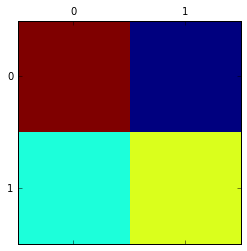

In [27]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier

clf1 = Pipeline([
    ('svd', TruncatedSVD(n_components=100)),
    ('clf', GaussianNB())
])
clf2 = Pipeline([
    ('svd', TruncatedSVD(n_components=100)),
    ('clf', QuadraticDiscriminantAnalysis())
])
clf3 = Pipeline([
    ('svd', TruncatedSVD(n_components=1000)),
    ('clf', XGBClassifier())
])

eclf = VotingClassifier(estimators=[('nb', clf1), ('qda', clf2), ('xgb', clf3)], voting='soft')

preds = cross_val_predict(eclf, X_res, y_res)

mat = confusion_matrix(y_res, preds)

plt.matshow(mat, cmap=plt.cm.gray)

In [28]:
from sklearn.metrics import f1_score

print("F1 score ensemble: {}".format(f1_score(preds, y_res)))

F1 score ensemble: 0.7098782904047551


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint

param_dist = {"nb__svd__n_components": sp_randint(2, 1000),
              "qda__svd__n_components": sp_randint(2, 1000),
              "xgb__svd__n_components": sp_randint(2, 1000),
              "xgb__clf__max_depth": sp_randint(3, 10)}

n_iter_search = 20
random_search = RandomizedSearchCV(eclf, param_distributions=param_dist,
                                   n_iter=n_iter_search)
random_search.fit(X_res, y_res)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/

# Testing

In [30]:
clf = random_search.best_estimator_
clf.fit(X_res, y_res)

preds = clf.predict(X_test)

print("F1 test score: {}".format(f1_score(preds, y_test)))

F1 test score: 0.2625482625482625


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(preds, y_test))

print("Precision: {}".format(precision_score(preds, y_test)))
print("Recall: {}".format(recall_score(preds, y_test)))

0.727142857143
Precision: 0.19653179190751446
Recall: 0.3953488372093023


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

